In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Allows us to create a list of files from a folder containing files
files = [file for file in os.listdir("./Sales_Data")]

# This will be the dataframe we place the files into
all_months_data = pd.DataFrame()

# Runs a loop to that reads each file into a df and then concats them into one larger dataframe
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

# Writes the new dataframe back into a new csv 
all_months_data.to_csv("./Sales_Data/all_data.csv", index=False)


In [3]:
# Grabs the new csv and creates the dataframe that we will be working with
all_data_df = pd.read_csv("./Sales_Data/all_data.csv")
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [4]:
# This was here because I had a weird issue when I first created the dataframe
#all_data_df = all_data_df.drop("Unnamed: 0", axis=1)

# Best Total Sales by Month

In [5]:
# Checks for rows that have NaN values in them
nan_df = all_data_df[all_data_df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Removes all rows with NaN in all columns
all_data_df = all_data_df.dropna(how='all')

In [7]:
# Removes the rows with the titles of the columns copied in them
all_data_df = all_data_df[all_data_df["Order Date"].str[0:2] != "Or"]

In [8]:
# Creates a column for months by grabbing the first 2 letters from the order date column
all_data_df["Month"] = all_data_df["Order Date"].str[0:2]
# Converts the month column from a string to and integer
all_data_df["Month"] = all_data_df["Month"].astype("int32")
all_data_df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [9]:
# Converts the quanity ordered and price each columns from strings into numbers to be used
all_data_df["Quantity Ordered"] = all_data_df["Quantity Ordered"].astype("int32")
all_data_df["Price Each"] = all_data_df["Price Each"].astype("float")

# Creates a sales column from the product of quanity ordered and price each columns
all_data_df["Sales"] = all_data_df["Quantity Ordered"]*all_data_df["Price Each"]

In [10]:
# Creates a groupby series for months and sales
by_month_total_sales_df = all_data_df.groupby("Month")["Sales"].sum()

# resets the index so that this becomes a dataframe with columns months and total sales
by_month_total_sales_df = by_month_total_sales_df.reset_index()

# Displays the month with the highest sales
by_month_total_sales_df.loc[by_month_total_sales_df["Sales"] == by_month_total_sales_df["Sales"].max()]

,Month,Sales
11,12,18453773.36


In [11]:
# Displays the dataframe with months and total sales
by_month_total_sales_df

,Month,Sales
0,1,7289026.92
1,2,8808089.68
2,3,11228401.52
3,4,13562680.96
4,5,12610427.00
5,6,10311209.04
6,7,10591103.04
7,8,8977871.52
8,9,8390240.52
9,10,14946907.52


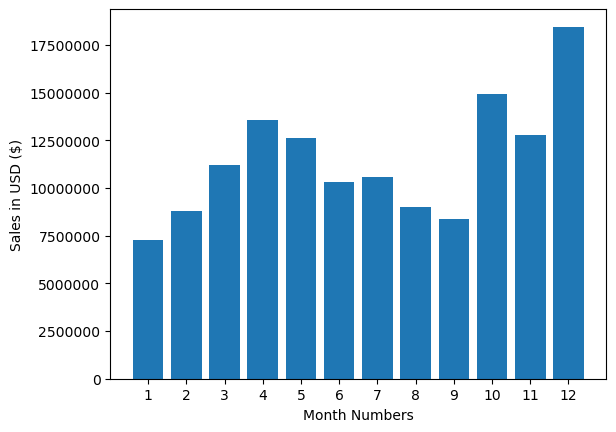

In [12]:
# Creates the initial bar graph
plt.bar(by_month_total_sales_df["Month"], by_month_total_sales_df["Sales"])

# Allows me to fix the y-axis so that the numbers display in standard form (instead of scientific)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)

# Helps display all the months numbers
plt.xticks(by_month_total_sales_df["Month"])

# Adds additional labels
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month Numbers")

# Displays the graph without the weird label
plt.show()

# Best Total Sales by City

In [13]:
# This is one way to grab a specific bit of text from a column
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data_df["City"] = all_data_df['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [14]:
# This is another way to get the city from the address column
all_data_df['Purchase Address'].str.split(',').str[1]


0          New York City
1          New York City
2          New York City
3          San Francisco
4                Atlanta
               ...      
747395            Boston
747396     New York City
747397     San Francisco
747398     San Francisco
747399           Atlanta
Name: Purchase Address, Length: 743800, dtype: object

In [15]:
# This is one way to grab a specific (state in this example) bit of text from a column
all_data_df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]


0         NY
1         NY
2         NY
3         CA
4         GA
          ..
747395    MA
747396    NY
747397    CA
747398    CA
747399    GA
Name: Purchase Address, Length: 743800, dtype: object

In [16]:
# Creates a groupby series with the city as the groupby column and total sales 
sales_by_city = all_data_df.groupby("City")["Sales"].sum()

# Resets the index and creates a dataframe with city and total sales as columns
sales_by_city_df = sales_by_city.reset_index()

# Displays the dataframe
sales_by_city_df

,City,Sales
0,Atlanta (GA),11181994.32
1,Austin (TX),7278327.00
2,Boston (MA),14646568.04
3,Dallas (TX),11071901.60
4,Los Angeles (CA),21810283.20
5,New York City (NY),18657269.72
6,Portland (ME),1799033.08
7,Portland (OR),7482929.36
8,San Francisco (CA),33048815.64
9,Seattle (WA),10991021.92


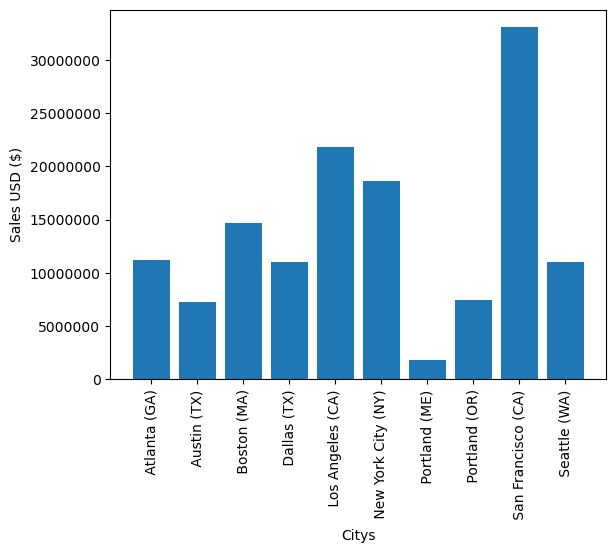

In [17]:
# Creates the initial graph
plt.bar(sales_by_city_df["City"], sales_by_city_df["Sales"])

# Allows me to fix the y-axis so that the numbers display in standard form (instead of scientific)
ax = plt.gca()
ax.yaxis.get_major_formatter().set_scientific(False)

# Fixes x labels so that they are vertical
plt.xticks(rotation=90)

# Adds additional labels
plt.ylabel("Sales USD ($)")
plt.xlabel("Citys")

# Shows the graph without the weird label above
plt.show()

# When is the best time to display ads to maximize likelihood that a customer's will buy a product?

In [18]:
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [19]:
# Convert order date column into a datetime data type
all_data_df['Order Date'] = pd.to_datetime(all_data_df['Order Date'])

/var/folders/hd/l4stjqk14jn9smh667z71gsw0000gn/T/ipykernel_77450/3866252593.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data_df['Order Date'] = pd.to_datetime(all_data_df['Order Date'])


In [21]:
# Create 2 columns for hour and minute from the order date column
all_data_df["Hour"] = all_data_df["Order Date"].dt.hour
all_data_df["Minute"] = all_data_df["Order Date"].dt.minute
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38
